In [3]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

data = pl.read_csv(
    "./sensor_data_200.txt",
    separator=" ",
    has_header=False,
    new_columns=["date", "time", "ir", "lidar"],
)

d = data[["ir", "lidar"]]

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


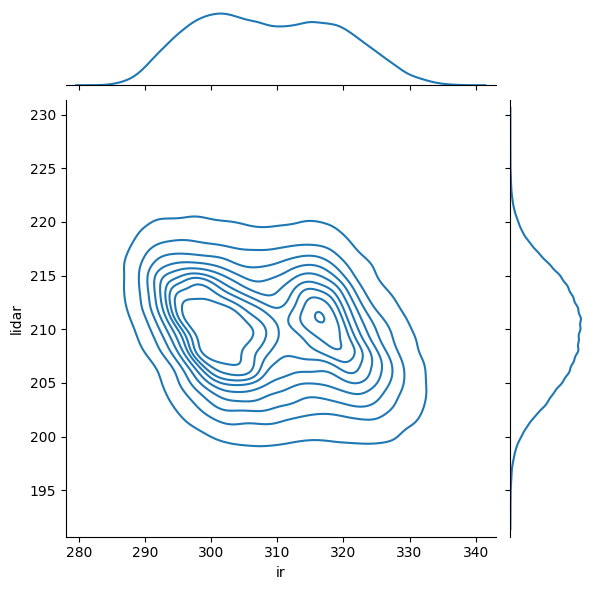

In [ ]:
sns.jointplot(d, x="ir", y="lidar", kind="kde")
d.to_pandas().cov()

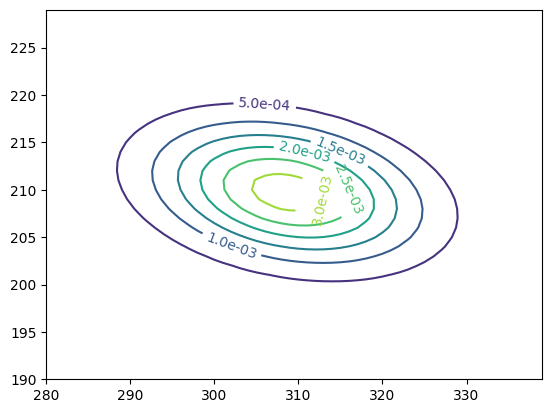

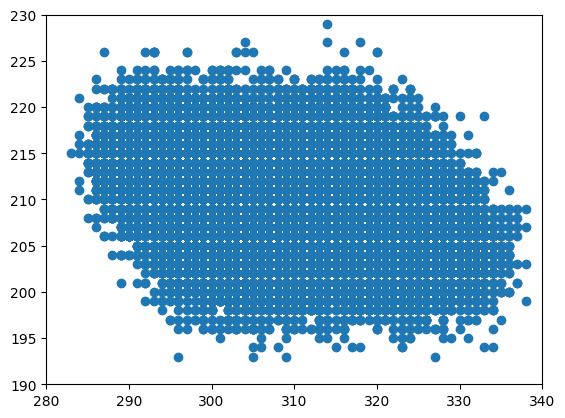

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[280:340, 190:230]
pos = np.empty(x.shape +(2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

ir_lidar = multivariate_normal(mean=d.mean().transpose().to_arrow()[0], cov=d.to_pandas().cov())
cont = plt.contour(x, y, ir_lidar.pdf(pos))
cont.clabel(fmt="%1.1e")

plt.show()

plt.scatter(data["ir"], data["lidar"])
plt.xlim(280, 340)
plt.ylim(190, 230)
plt.show()

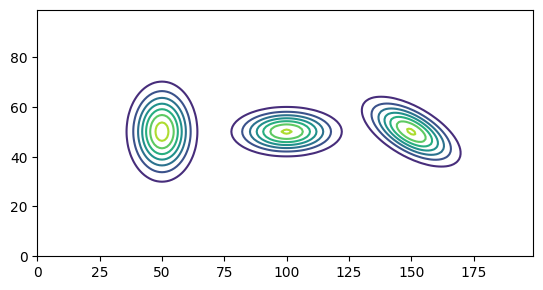

In [ ]:
import math

x, y = np.mgrid[0:200, 0:100]
pos = np.empty(x.shape + (2, ))
pos[:, :, 0] = x
pos[:, :, 1] = y

a = multivariate_normal(mean=[50, 50], cov=[[50, 0], [0, 100]])
b = multivariate_normal(mean=[100, 50], cov=[[125, 0], [0, 25]])
c = multivariate_normal(mean=[150, 50], cov=[[100, -25 * math.sqrt(3)], [-25 * math.sqrt(3), 50]])

for e in [a, b, c]:
    plt.contour(x, y, e.pdf(pos))

plt.gca().set_aspect("equal")
plt.show()

In [20]:
eig_vals, eig_vec = np.linalg.eig(c.cov)

print("eig_vals:", eig_vals)
print("eig_vec:", eig_vec)
print("固有ベクトル1:", eig_vec[:, 0])
print("固有ベクトル2:", eig_vec[:, 1])

eig_vals: [125.  25.]
eig_vec: [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]
固有ベクトル1: [ 0.8660254 -0.5      ]
固有ベクトル2: [0.5       0.8660254]


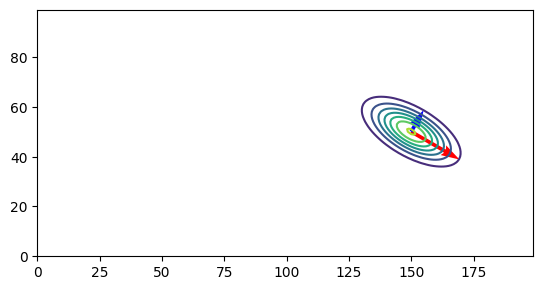

In [29]:
plt.contour(x, y, c.pdf(pos))

v = 2 * math.sqrt(eig_vals[0]) * eig_vec[:, 0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="red", angles="xy", scale_units="xy", scale=1)

v = 2 * math.sqrt(eig_vals[1]) * eig_vec[:, 1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color="blue", angles="xy", scale_units="xy", scale=1)

plt.gca().set_aspect("equal")
plt.show()

In [30]:
v = eig_vec
l = np.diag(eig_vals)

print(v.dot(l.dot(np.linalg.inv(v))))
print(np.array([[100, -25 * math.sqrt(3)], [-25 * math.sqrt(3), 50]]))

[[100.         -43.30127019]
 [-43.30127019  50.        ]]
[[100.         -43.30127019]
 [-43.30127019  50.        ]]
